# Laboratório 6 - Gabarito

Nota: Substitua os seus nomes e informações abaixo antes do envio da atividade. A atividade deve ser enviada no `Moodle` da disciplina, e o arquivo **DEVE** estar no formato `.ipynb`.

[Nome Aluno 1] / [NUSP Aluno 1] / [Vespertino/Noturno]

[Nome Aluno 2] / [NUSP Aluno 2] / [Vespertino/Noturno]


## Exercícios

1 - Agora é sua vez, vamos pegar um outro banco de dados. Importe o seguinte banco de dados "Healthcare-Diabetes.csv"

In [1]:
url = "https://raw.githubusercontent.com/PedroSchmalz/FLP0478/refs/heads/main/book/aulas/aula6/dataset/Healthcare-Diabetes.csv"

In [3]:
import pandas as pd

df = pd.read_csv(url)

df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


No seguinte kaggle ([link](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/)) você encontra mais informações sobre o banco.

2 - Calcule a proporção de cada classe do target ('Outcome')

In [4]:
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.656069
1,0.343931


a) Discuta o balanceamento de classes deste banco de dados

Resposta: Temos um certo desbalanceamento entre as classes, mas nada que pareça afetar profundamente os resultados do modelo de aprendizado de máquina.

3 - Faça uma matriz de correlação das variáveis independentes. Há alguma variável que pareça ser muito correlacionada com outra (muito próximo de 1)?

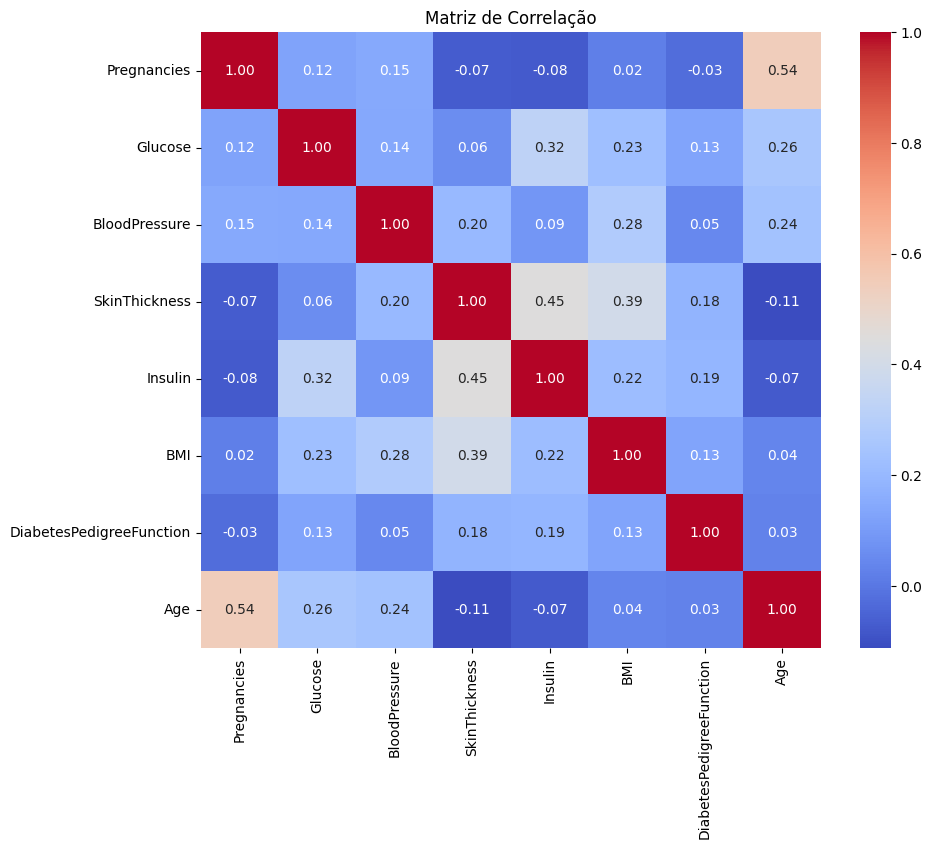

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um novo banco só com as variáveis explicativas
df_ind = df.drop(['Id', 'Outcome'], axis=1)

# A matriz de correlação pode ser calculada assim:
correlation_matrix = df_ind.corr()

# Agora, crie uma matriz de calor (heatmap) com o Seaborn
plt.figure(figsize=(10, 8))  # Ajuste o tamanho do gráfico, se necessário
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Exiba o gráfico
plt.title("Matriz de Correlação")
plt.show()

4 - Rode um modelo de regressão logística do **Statmodels** e imprima o summary. Utilize todas as variáveis do banco.

In [8]:
import statsmodels.formula.api as smf

# Definindo o modelo
model = smf.logit('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age', data=df).fit()

# Imprimindo o resultado
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.476678
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2768
Model:                          Logit   Df Residuals:                     2759
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Oct 2025   Pseudo R-squ.:                  0.2594
Time:                        17:17:09   Log-Likelihood:                -1319.4
converged:                       True   LL-Null:                       -1781.5
Covariance Type:            nonrobust   LLR p-value:                3.531e-194
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.1213      0.369    -22.025      0.000      -8.844

5 - De acordo com os resultados do exercício 4, quais variáveis tem efeito positivo nas chances de se ter diabetes?

RESPOSTA: pregnancies, glucose, BMI, DiabetesPedigreeFunction, Age

6 - E quais tem efeito negativo?

Resposta: Pressão do sangue, insulina

7 - Por fim, quais não são estatisticamente significantes?

Resposta: SkinThickness

8 - Separe as colunas em um vetor X de features e o target (Outcome). Também separe o banco entre treino e teste (com 20% para teste).

In [12]:
from sklearn.model_selection import train_test_split # Função para dividir o banco entre treino e teste

# Divide os dados em features (X) e target (y)
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']]
y = df['Outcome']


# Desempacotando cada parte com o train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, # Vetor de variáveis explicativas
                                                        y, # Target (Ou Var. Dep.)
                                                        test_size=0.2, # Porcentagem que vai ficar para teste (20%)
                                                        random_state=42) # Seed para garantir a estabilidade dos resultados

print(X_treino)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
2124            4      109             64             44       99  34.8   26
2716            1      118             58             36       94  33.3   23
2232            2      123             48             32      165  42.1   26
261             3      141              0              0        0  30.0   27
2059            8       84             74             31        0  38.3   39
...           ...      ...            ...            ...      ...   ...  ...
1638            4       95             64              0        0  32.0   31
1095           10      179             70              0        0  35.1   37
1130            5      103            108             37        0  39.2   65
1294            1       97             64             19       82  18.2   21
860             7       81             78             40       48  46.7   42

[2214 rows x 7 columns]


In [13]:
y_treino

,Outcome
2124,1
2716,0
2232,0
261,1
2059,0
...,...
1638,1
1095,0
1130,0
1294,0


9 - Agora, treine um modelo de regressão logística utilizando o sklearn

In [15]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression() # Modelo de Regressão Logística do SkLearn

# Treinando o modelo
modelo.fit(X_treino, y_treino)

LogisticRegression()

10 - Faça a predição dos valores do banco de teste e imprima o array de predições.

In [16]:
y_pred = modelo.predict(X_teste)


y_pred # Nosso array de previsões

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

11 - Apresente a acurácia do modelo

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_teste, # Valores Reais
                          y_pred) # Valores preditos pelo modelo

print(f"Acurácia: {accuracy}")

Acurácia: 0.7689530685920578


a) Discuta os resultados do modelo com base na acurácia:

RESPOSTA: Considerando a proporção das classes (1:2), o modelo atinge um resultado um pouco melhor do que só chutar a classe majoritária (66% das observações). No entanto, ainda deixa a desejar

12 - Apresente a matriz de confusão do modelo

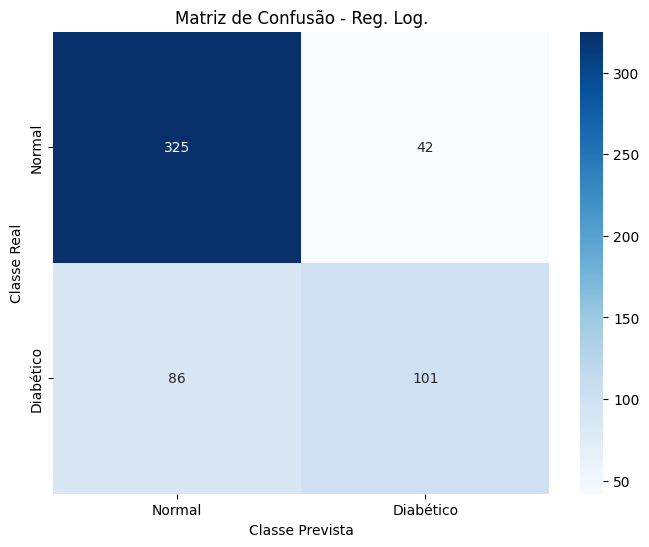

In [19]:
from sklearn.metrics import confusion_matrix, classification_report # Algumas métricas e relatórios

mat_conf = confusion_matrix(y_teste, y_pred)


# Defina os rótulos das classes
class_names = ['Normal', 'Diabético']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - Reg. Log.')
plt.show()

a) Compare os resultados desse modelo com o que rodamos para o banco *Default*. Qual a principal diferença entre esses dois bancos?

RESPOSTA: A principal diferença (além do número de covariáveis) é a proporção das classes. o Banco *default* tinha resultados muito piores em termos da classe minoritária, mas uma acurácia ótima. Esse modelo apresenta resultados mais equilibrados para ambas as classes, apesar de medianos.

13 - Por fim, apresente o relatório de classificação

In [21]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       367
           1       0.71      0.54      0.61       187

    accuracy                           0.77       554
   macro avg       0.75      0.71      0.72       554
weighted avg       0.76      0.77      0.76       554



a) O modelo foi bem? Discuta à luz dos resultados obtidos no banco default, do desbalanceamento das classes em ambos os bancos.

RESPOSTA: Novamente, o modelo tem um F1-Macro mediano (0.72), mas bons resultados em ambas as classes, diferente do modelo para o banco default, que tem resultados ruins para a classe minoritária.